# PREDICTING MEDICAL EXPENSES USING LINEAR REGRESSION

Rosa Karina Torres Calderon

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Functions

In [4]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, ax=None, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.4, 0.97), size = 18, xycoords = ax.transAxes)

In [5]:
def categoricalToNumerical(posColumn, dataframe):
    enc = LabelEncoder()
    label_encoder = enc.fit(dataframe.iloc[:, posColumn])
    print("Clases categoricas: ", label_encoder.classes_)
    t = label_encoder.transform(dataframe.iloc[:, posColumn])
    dataframe.iloc[:, posColumn] = t
    return dataframe

# Step 1- Reading the data set

In [6]:
insurance = pd.read_csv("insurance.csv")
print(insurance.head(5))
print(" ")
print('Tamaño del data frame: ' + str(insurance.shape))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
 
Tamaño del data frame: (1338, 7)


# Step 2- Exploring and preparing the data

In [7]:
print(insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
print(insurance.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


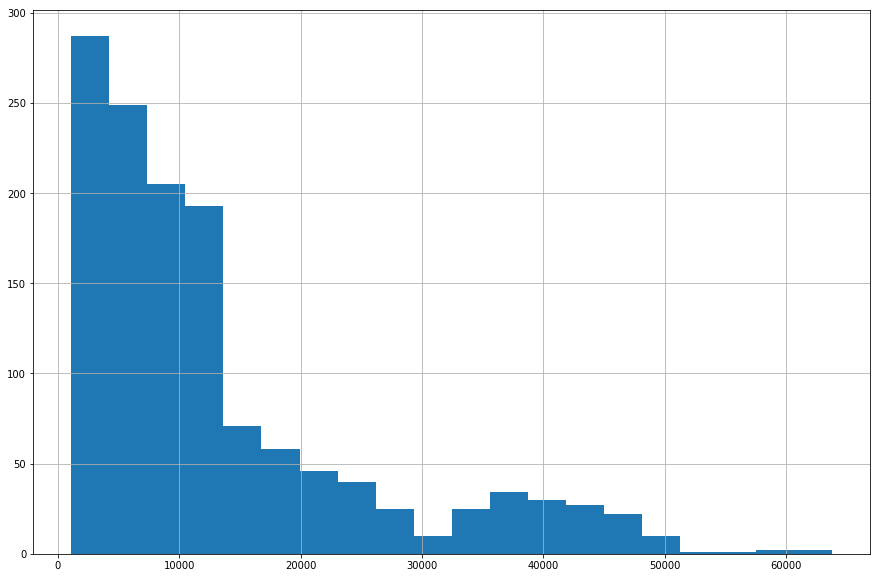

In [9]:
# Distribution of the dependant variable 
%matplotlib inline
insurance['charges'].hist(bins = 20, figsize= (15,10))
plt.show()

In [9]:
# Visualization of categorical  features
print("Regiones: ")
print(insurance["region"].value_counts()) 

Regiones: 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


 Exploring relationships among features - the correlation matrix

In [10]:
# Create the correlation matrix 
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Visualizing relationships among features - the scatterplot matrix

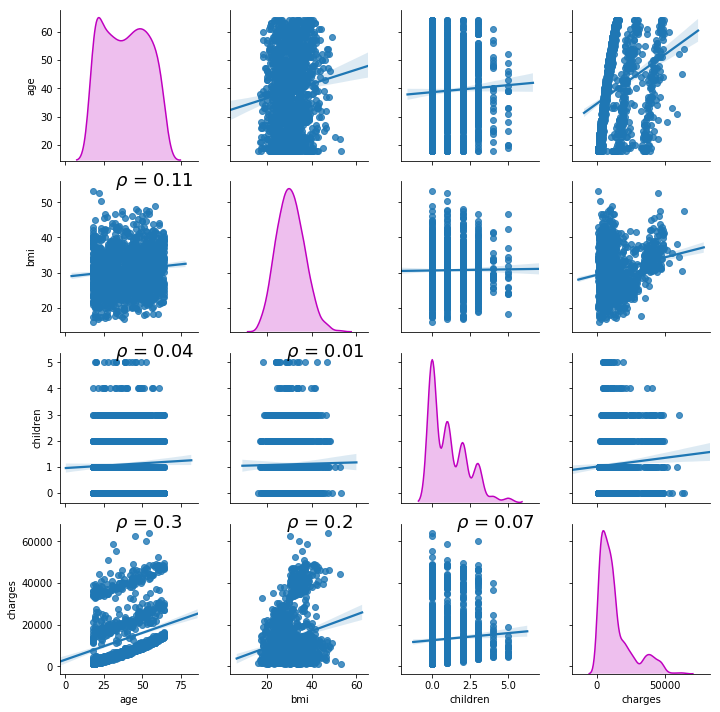

In [11]:
%matplotlib inline
g = sns.pairplot(insurance,kind ='reg',diag_kind ='kde',diag_kws = dict(color="m"))
g.map_lower(corr)
plt.show()

In [12]:
# Split data in train sets
insurance_train = insurance[['age','sex','bmi','children','smoker','region']]
print(insurance_train.head(5))

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest


In [13]:
# Split data in test sets
insurance_target = insurance.iloc[:,6:]
print(insurance_target.head(5))

       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


In [14]:
insurance_train = categoricalToNumerical(1, insurance_train)
insurance_train = categoricalToNumerical(4, insurance_train)

insurance_train_zones = pd.get_dummies(insurance_train['region'],dummy_na=True)
insurance_train_zones.columns = ['northeast','northwest','southeast','southwest','N']
insurance_train_zones = insurance_train_zones.drop(['N'],axis = 1)
insurance_train = insurance_train.drop(['region'],axis = 1)
insurance_train = pd.concat([insurance_train, insurance_train_zones], axis=1)
print(insurance_train.head(5))

Clases categoricas:  ['female' 'male']
Clases categoricas:  ['no' 'yes']
   age  sex     bmi  children  smoker  northeast  northwest  southeast  \
0   19    0  27.900         0       1          0          0          0   
1   18    1  33.770         1       0          0          0          1   
2   28    1  33.000         3       0          0          0          1   
3   33    1  22.705         0       0          0          1          0   
4   32    1  28.880         0       0          0          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0  


/Users/karinatorres/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Step 3- Training a Model on the data

In [15]:
regresion = LinearRegression()
model = regresion.fit(insurance_train, insurance_target)

# Step 4- Evaluating model performance

In [17]:
predictions = model.predict(insurance_train)
print(predictions)

[[25293.7130284 ]
 [ 3448.60283431]
 [ 6706.9884907 ]
 ...
 [ 4149.13248568]
 [ 1246.58493898]
 [37085.62326757]]


In [18]:
#Estimated beta coefficients:
coefficients = pd.concat([pd.DataFrame(insurance_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)

           0             0
0        age    256.856353
1        sex   -131.314359
2        bmi    339.193454
3   children    475.500545
4     smoker  23848.534542
5  northeast    587.009235
6  northwest    234.045336
7  southeast   -448.012814
8  southwest   -373.041756


In [20]:
model.intercept_

array([-12525.5478112])

In [50]:
r_sq = model.score(insurance_train, insurance_target)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.8651583302674541
19760071.321216572


# Step 5- Improving model performance

Model specification - Adding non-linear relationships

In [22]:
# The effect of age on medical expenditures may not be constant throughout all age values
insurance_train['ageNoLinear'] = insurance_train['age']**2
print(insurance_train.head(5))

   age  sex     bmi  children  smoker  northeast  northwest  southeast  \
0   19    0  27.900         0       1          0          0          0   
1   18    1  33.770         1       0          0          0          1   
2   28    1  33.000         3       0          0          0          1   
3   33    1  22.705         0       0          0          1          0   
4   32    1  28.880         0       0          0          1          0   

   southwest  ageNoLinear  
0          1          361  
1          0          324  
2          0          784  
3          0         1089  
4          0         1024  


Transformation - converting a numeric variable to a binary indicator

In [24]:
# BMI may have zero impact on medical expenditures for individuals in normal weight range,
# but it may be strongly related to higher costs for the obese (BMI of 30 or above)
insurance_train.loc[insurance_train.bmi < 30, 'bmi'] = 0
insurance_train.loc[insurance_train.bmi >= 30, 'bmi'] = 1
print(insurance_train.head(5))

   age  sex  bmi  children  smoker  northeast  northwest  southeast  \
0   19    0  0.0         0       1          0          0          0   
1   18    1  1.0         1       0          0          0          1   
2   28    1  1.0         3       0          0          0          1   
3   33    1  0.0         0       0          0          1          0   
4   32    1  0.0         0       0          0          1          0   

   southwest  ageNoLinear  
0          1          361  
1          0          324  
2          0          784  
3          0         1089  
4          0         1024  


Model specification - Adding interactions effects 

In [24]:
#Add a interaction
interactions = PolynomialFeatures(degree=2, interaction_only=True)
interactions_train = pd.DataFrame(interactions.fit_transform(insurance_train), columns=interactions.get_feature_names(insurance_train.columns))
#Add bmi-smoker interaction
insurance_train = pd.concat([insurance_train, interactions_train['bmi smoker']], axis=1)
print(insurance_train.head(5))


   age  sex  bmi  children  smoker  northeast  northwest  southeast  \
0   19    0  0.0         0       1          0          0          0   
1   18    1  1.0         1       0          0          0          1   
2   28    1  1.0         3       0          0          0          1   
3   33    1  0.0         0       0          0          1          0   
4   32    1  0.0         0       0          0          1          0   

   southwest  ageNoLinear  bmi smoker  
0          1          361         0.0  
1          0          324         0.0  
2          0          784         0.0  
3          0         1089         0.0  
4          0         1024         0.0  


In [26]:
model = regresion.fit(insurance_train, insurance_target)

In [27]:
r_sq = model.score(insurance_train, insurance_target)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8651583302674541
